In [1]:
library(dplyr)
library(ggplot2)

galton <- read.csv('../tablas/galton.csv', sep="\t",
                  stringsAsFactors=FALSE)

galton <- galton %>% mutate(Father = round(Father*2.54, 0), Son = round(Son*2.54,0))
head(galton)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



,Father,Son
,<dbl>,<dbl>
1,165,152
2,161,161
3,165,161
4,167,160
5,155,163
6,160,163


,Father,Son
Father,1.0000000,0.4957892
Son,0.4957892,1.0000000


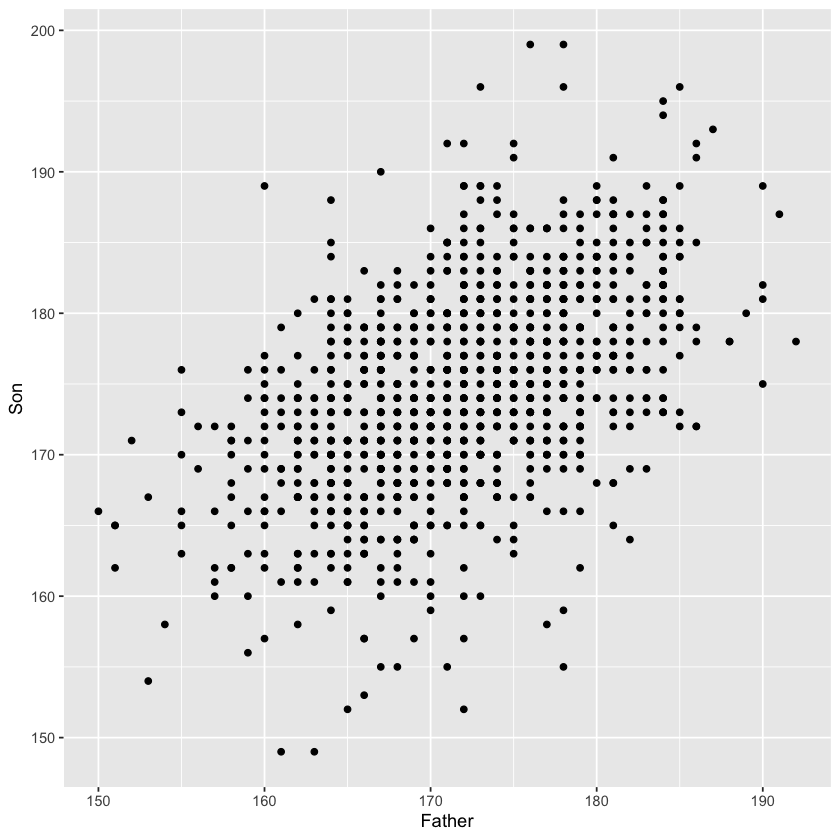

In [2]:
ggplot(galton, aes(x=Father, y=Son)) + geom_point()

cor(galton)

[1] 171.9156

[1] 174.4481

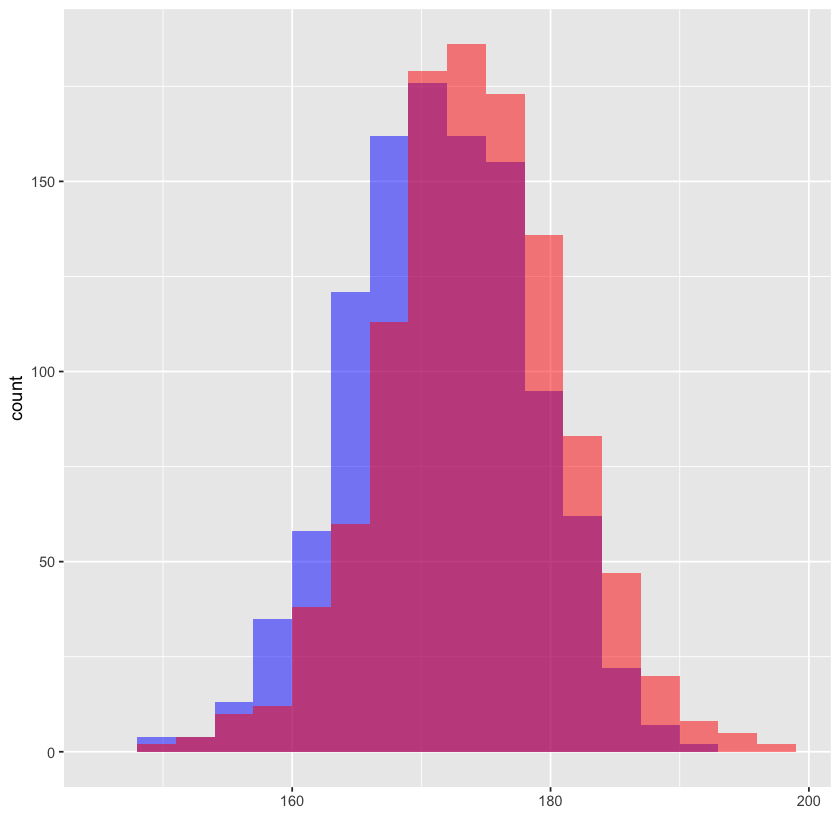

In [3]:
breaks <- seq(145, 200, by=3)
ggplot(galton) + geom_histogram(aes(Father), breaks = breaks, fill ="blue", alpha=0.5) +  
        geom_histogram(aes(Son), breaks = breaks,  fill ="red", alpha=0.5) + xlab("")

prom_Father <- mean(galton$Father)
prom_Son <- mean(galton$Son)

prom_Father
prom_Son

# Las personas muy altas, van a tener hijos muy altos? 


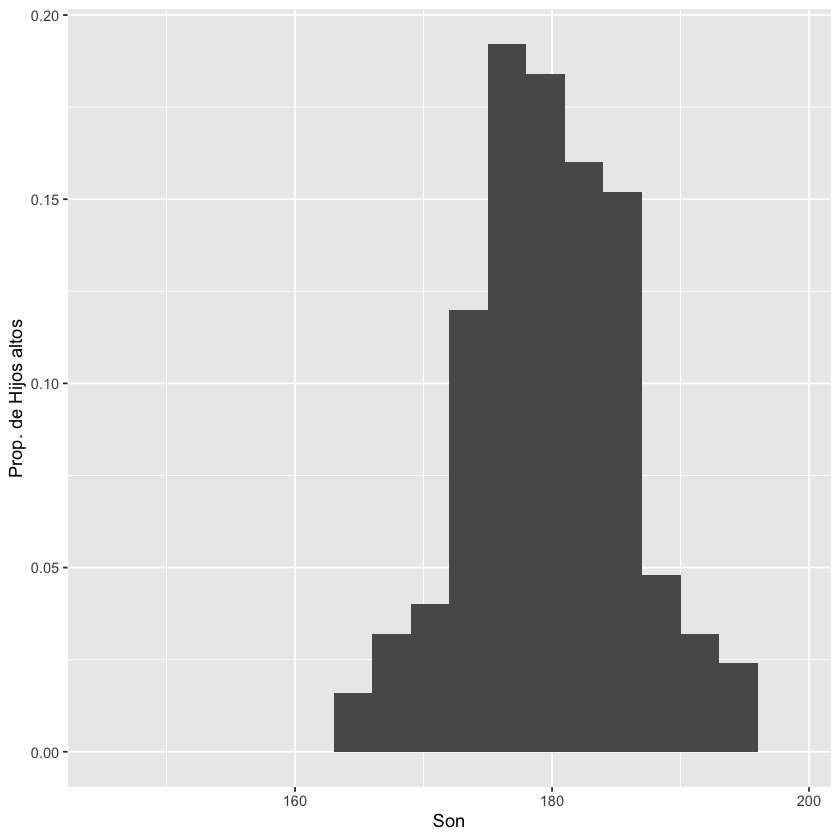

In [4]:
altos <- galton %>% filter(Father > 180)

ggplot(altos) + geom_histogram(aes(x = Son, y = ..count../sum(..count..)), breaks = breaks) + 
                ylab("Prop. de Hijos altos")

In [5]:
dim(altos)[1]
length(altos$Son[altos$Son < 180])
mean(altos$Son[altos$Son < 180])
mean(altos$Son)
mean(altos$Father)

[1] 125

[1] 57

[1] 174.8947

[1] 180.28

[1] 183.488

In [6]:
galton <- galton %>% mutate(Father_SU = (Father - mean(Father))/sd(Father), Son_SU = (Son - mean(Son))/sd(Son))
head(galton)

,Father,Son,Father_SU,Son_SU
,<dbl>,<dbl>,<dbl>,<dbl>
1,165,152,-0.9902295,-3.138458
2,161,161,-1.5629819,-1.880169
3,165,161,-0.9902295,-1.880169
4,167,160,-0.7038533,-2.019979
5,155,163,-2.4221106,-1.600550
6,160,163,-1.7061701,-1.600550


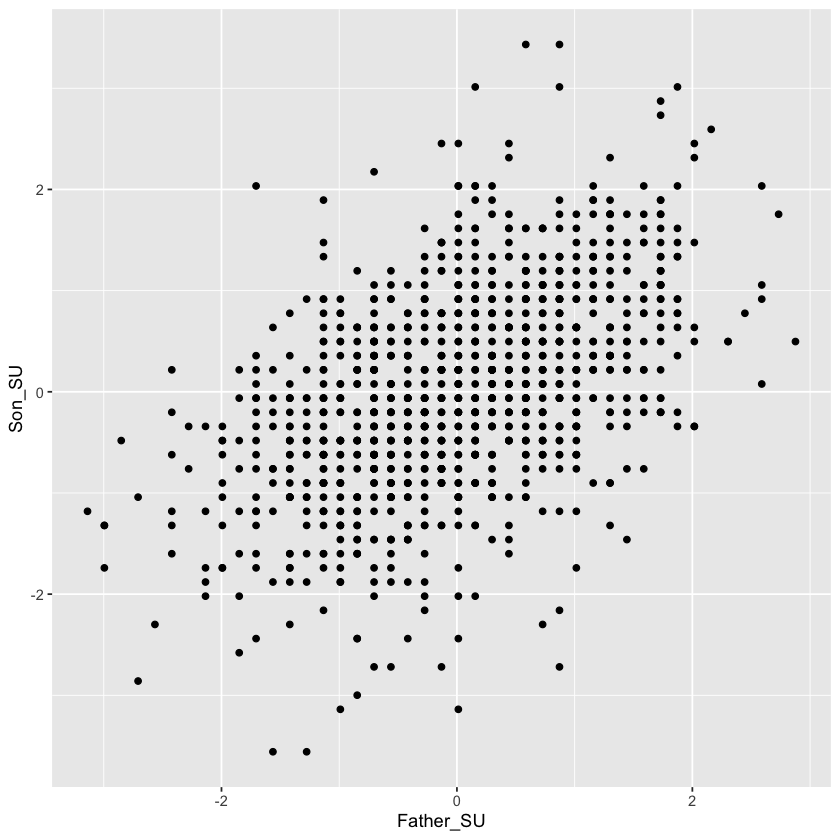

In [7]:
ggplot(galton) + geom_point(aes(Father_SU, Son_SU))

In [8]:
co_SU <- (180 - mean(galton$Father))/sd(galton$Father) 

pmAl_SU <- mean((altos$Son - mean(galton$Son))/sd(galton$Son))

co_SU
pmAl_SU

pmAl_SU/co_SU

[1] 1.157592

[1] 0.8153635

[1] 0.7043616

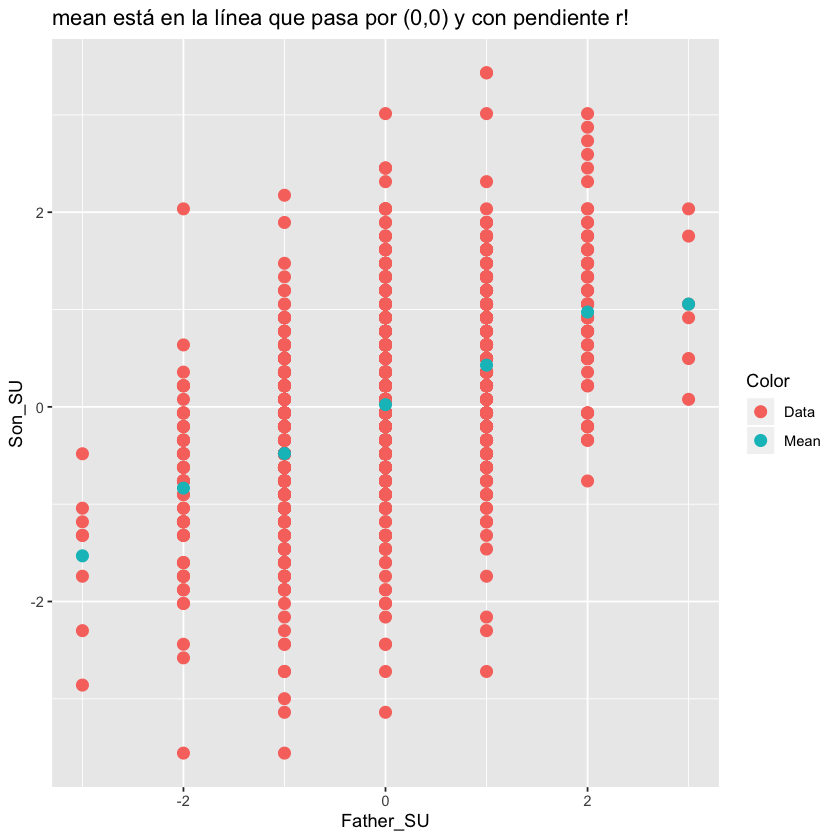

In [9]:
library(tidyr)
galton_rounded_SU <- galton %>% select(Father_SU, Son_SU) %>% mutate(Color = "Data") %>% 
            mutate(Father_SU = round(Father_SU, 0))

galton_rounded_mean <- galton %>% select(Father_SU, Son_SU) %>% 
    mutate(Father_SU = round(Father_SU, 0)) %>% 
    group_by(Father_SU) %>% summarize(Son_SU = mean(Son_SU)) %>% mutate(Color = "Mean")

galton_reg <- rbind(galton_rounded_SU, galton_rounded_mean)

ggplot(galton_reg) + geom_point(aes(Father_SU, Son_SU, color = Color), size = 3) +
    ggtitle("mean está en la línea que pasa por (0,0) y con pendiente r!")

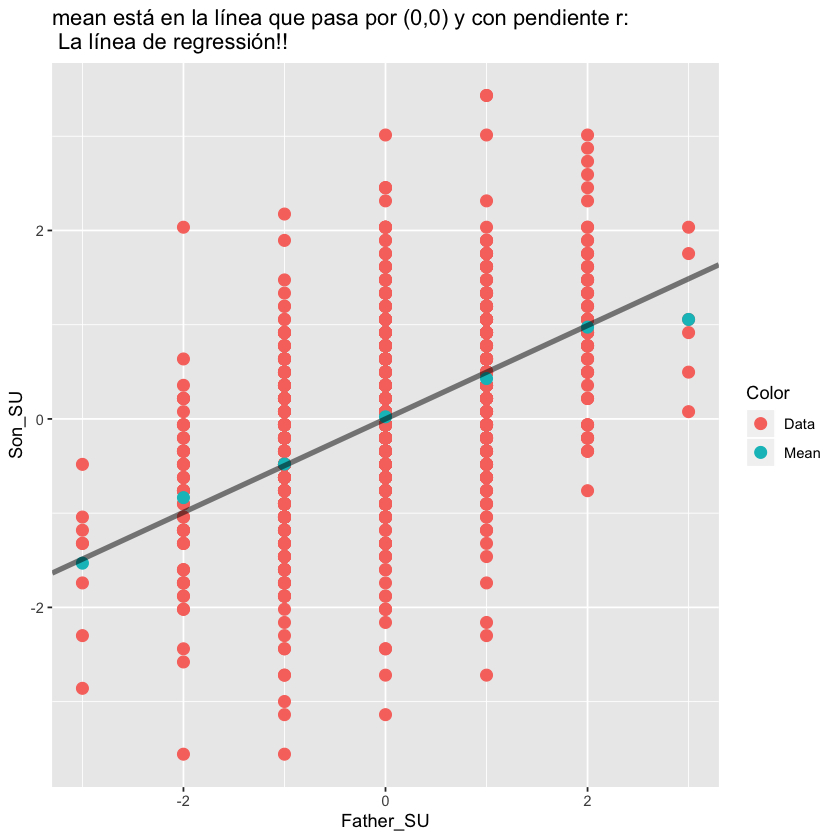

In [10]:
r <- 0.4957892
ggplot(galton_reg) + geom_point(aes(Father_SU, Son_SU, color = Color), size = 3) +
    geom_abline(slope = r, intercept = c(0,0), alpha = 0.5, size = 1.5) + 
    ggtitle("mean está en la línea que pasa por (0,0) y con pendiente r: \n La línea de regressión!!")

## La línea de regresión escoge el valor promedio para cada tira vertical de datos con posición Father_SU. 

Nos dice el valor promedio de y para cualquier x.

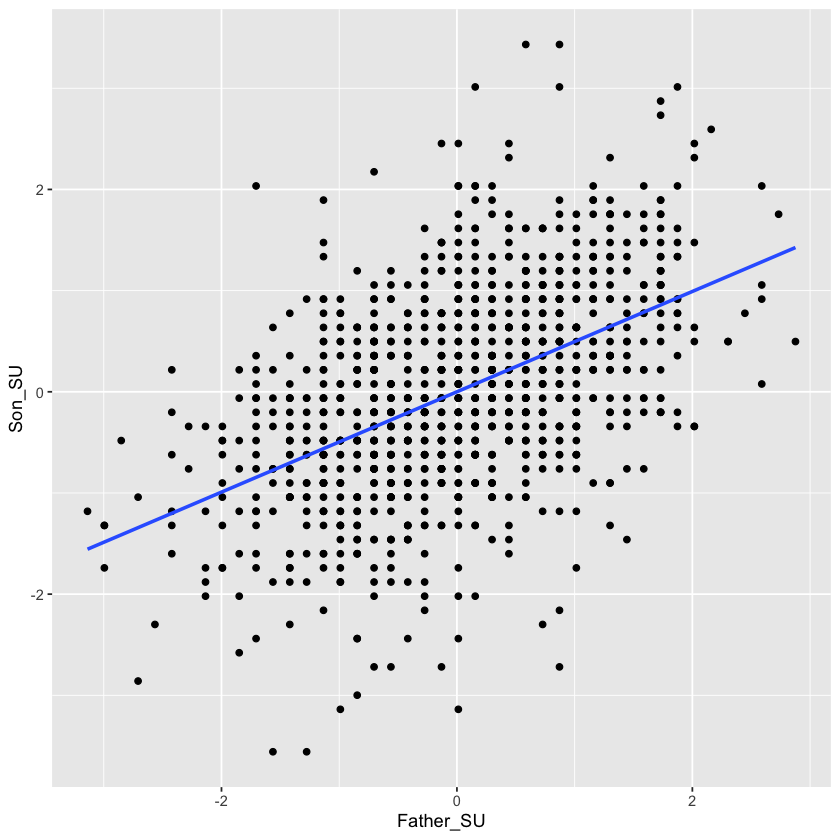

In [11]:
ggplot(galton, aes(Father_SU, Son_SU)) + geom_point() + geom_smooth(method=lm, se=F)

In [141]:
(r * 1.15759222279979) * sd(galton$Son) + mean(galton$Son)

# De acuerdo a la línea es 179, en realidad es 180!! Es una buena predicción, 1cm de error.

[1] 178.5531

# Dibujo de los promedios. 

Agrupamos a cada x con un representante. 

Promediamos los y para cada representante.

la asociación es casi lineal: Los puntos están en la línea de regresión.   


# Regresión a la media. 

pares (x, y) medidos en SU. 

En promedio, la desviación de x alrededor de 0, es mas pequeña que la de y.

\begin{equation} \Huge y_{SU} = \underbrace{r}_{Corr} \times x_{SU} \end{equation}


# Notas:

Hay dos pruebas: un examen y un final. 

examen: promedio = 70, sd = 10.

final: promedio = 50, sd = 12.

La correlación de las dos notas es r = 0.75. Los datos tienen una asociación lineal. 

Qué nota esperan tener en el final si sacaron 90 en el examen? Si sacaron 65?

In [25]:
x <- 90
r <- 0.75

x_SU <- (x - 70)/10

x_final <- (r * x_SU) * 12 + 50  

x_final

[1] 68

In [26]:
x <- 65
r <- 0.75

x_SU <- (x - 70)/10

x_final <- (r * x_SU) * 12 + 50  

x_final

[1] 45.5

In [154]:
90 - 65

68 - 45.5

# la dif es mas pequeña a pesar de que la sd final es mas grande. En promedio. 

[1] 25

[1] 22.5

# Línea de Regresión

\begin{equation} \Huge
\frac{y - mean(y)}{sd(y)} = r \ \frac{x - mean(x)}{sd(x)}
\end{equation}

Entonces, 

\begin{equation} \Huge
a = r \ \frac{sd(y)}{sd(x)} \\ \Huge
b = mean(y) - a \ mean(x)
\end{equation}

La línea es:


\begin{equation} \Huge
y = a \ x + b
\end{equation}


In [28]:
a <- r* (sd(galton$Son)/sd(galton$Father))

b <- mean(galton$Son) - a * mean(galton$Father)

a # cuantos cms cambia el hijo por cada cm de padre. 
b # unidades en cm cuando el padre mide 0cm... 

[1] 0.7681227

[1] 42.39578

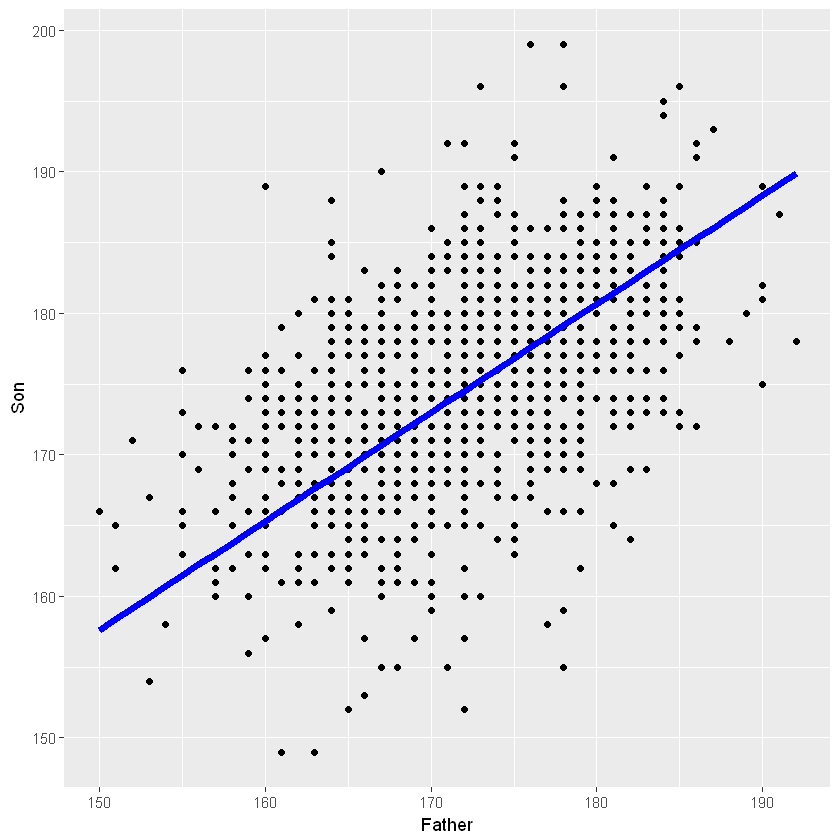

In [29]:
pred_Son <- a * galton$Father + b 

galton <- galton %>% mutate(pred = pred_Son)

ggplot(galton) + geom_point(aes(Father, Son)) + geom_line(aes(Father, pred), color = "blue", size = 2)

 SU: 
 
 -> 1 up r
 
 Unidades originales: 
 
 -> SD_x up r*SD_y